In [1]:
%matplotlib inline

In [2]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [3]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [4]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):
    
    fig = plt.figure();
    ax = fig.add_axes([0,0,1,1], projection= '3d');
    ax.axis('off')
    
    ax.set_xlim((-25,25))
    ax.set_ylim((-35,35))
    ax.set_zlim((5,55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
    
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))
    
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t) for x0i in x0])
    
    
    colors = plt.cm.jet(np.linspace(0, 1, N));
    
    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '_', c=colors[i])
        _=plt.setp(lines, linewidth=2);
    
    ax.view_init(30, angle)
    _ = plt.show();
    
    return t, x_t
    

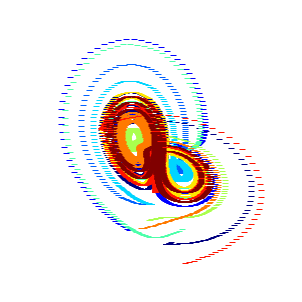

In [5]:
t, x_t = solve_lorenz(angle=0, N=10)

In [6]:
w = interactive(solve_lorenz, angle=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w);

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…